In [1]:
from pipeline.paths import Directories, Files
import os

PHASE = '7'
DATA_VERSION = '13'


# Base directory
WORK_ROOT = "D:/NoahSilverberg/ngCBCT"

# NSG_CBCT Path where the raw matlab data is stored
NSG_CBCT_PATH = "D:/MitchellYu/NSG_CBCT"

# Directory with all files specific to this phase/data version
PHASE_DATAVER_DIR = os.path.join(
    WORK_ROOT, f"phase{PHASE}", f"DS{DATA_VERSION}"
)

DIRECTORIES = Directories(
    mat_projections_dir=os.path.join(NSG_CBCT_PATH, "data/prj/HF/mat"),
    pt_projections_dir=os.path.join(WORK_ROOT, "prj_pt"),
    projections_aggregate_dir=os.path.join(PHASE_DATAVER_DIR, "aggregates", "projections"),
    projections_model_dir=os.path.join(PHASE_DATAVER_DIR, "models", "projections"),
    projections_results_dir=os.path.join(PHASE_DATAVER_DIR, "results", "projections"),
    projections_gated_dir=os.path.join(WORK_ROOT, "gated", "prj_mat"),
    reconstructions_dir=os.path.join(PHASE_DATAVER_DIR, "reconstructions"),
    reconstructions_gated_dir=os.path.join(WORK_ROOT, "gated", "fdk_recon"),
    images_aggregate_dir=os.path.join(PHASE_DATAVER_DIR, "aggregates", "images"),
    images_model_dir=os.path.join(PHASE_DATAVER_DIR, "models", "images"),
    images_results_dir=os.path.join(PHASE_DATAVER_DIR, "results", "images"),
)

FILES = Files(DIRECTORIES)

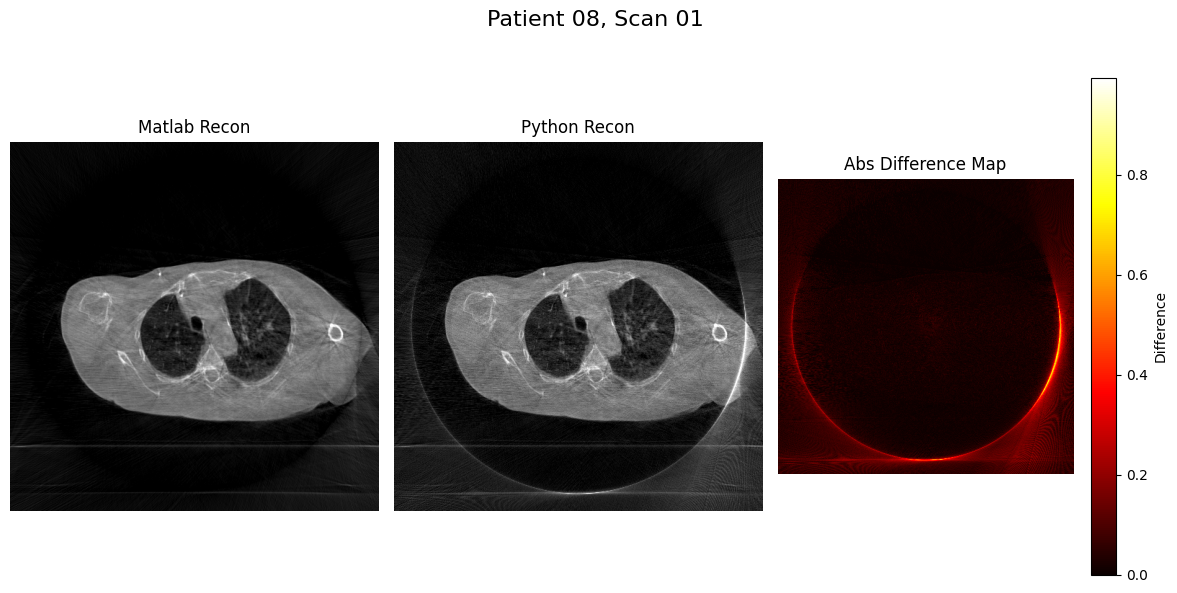

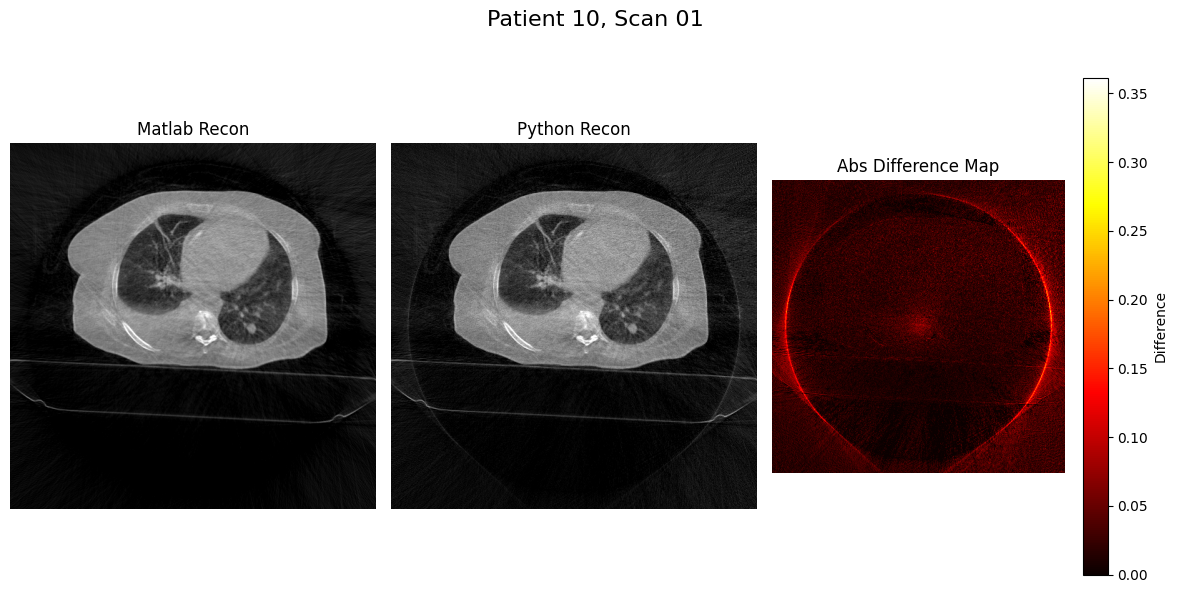

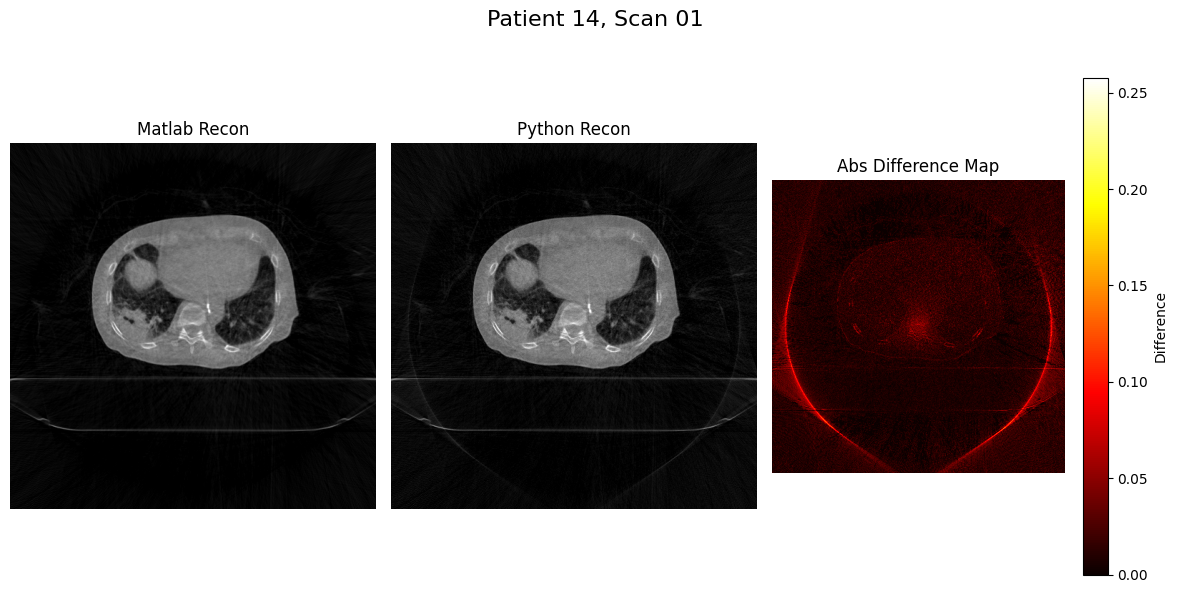

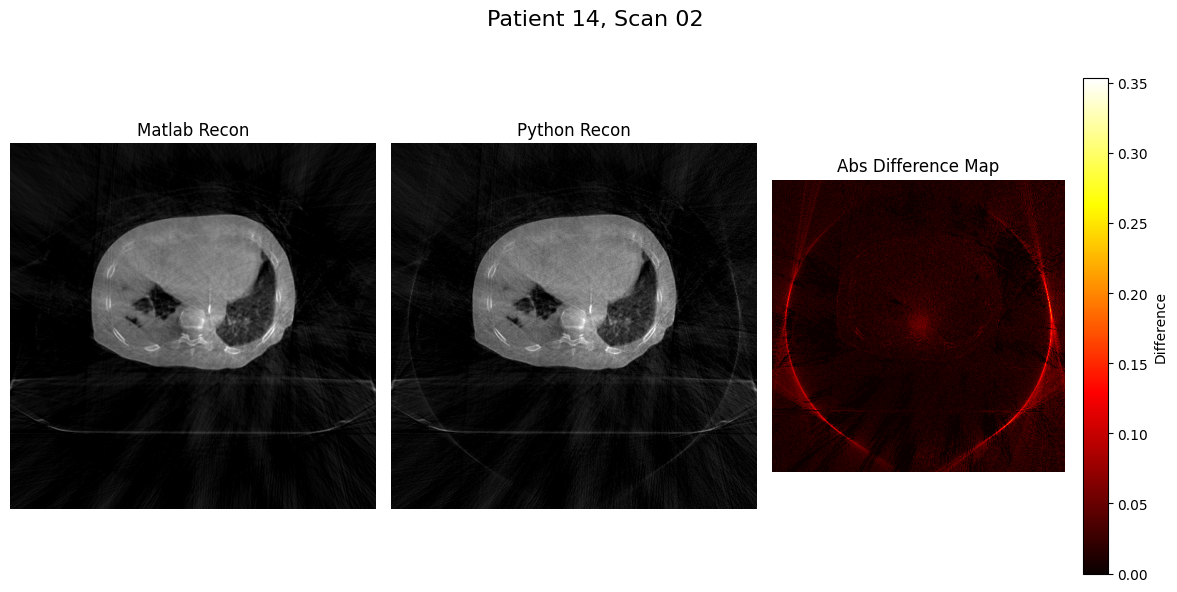

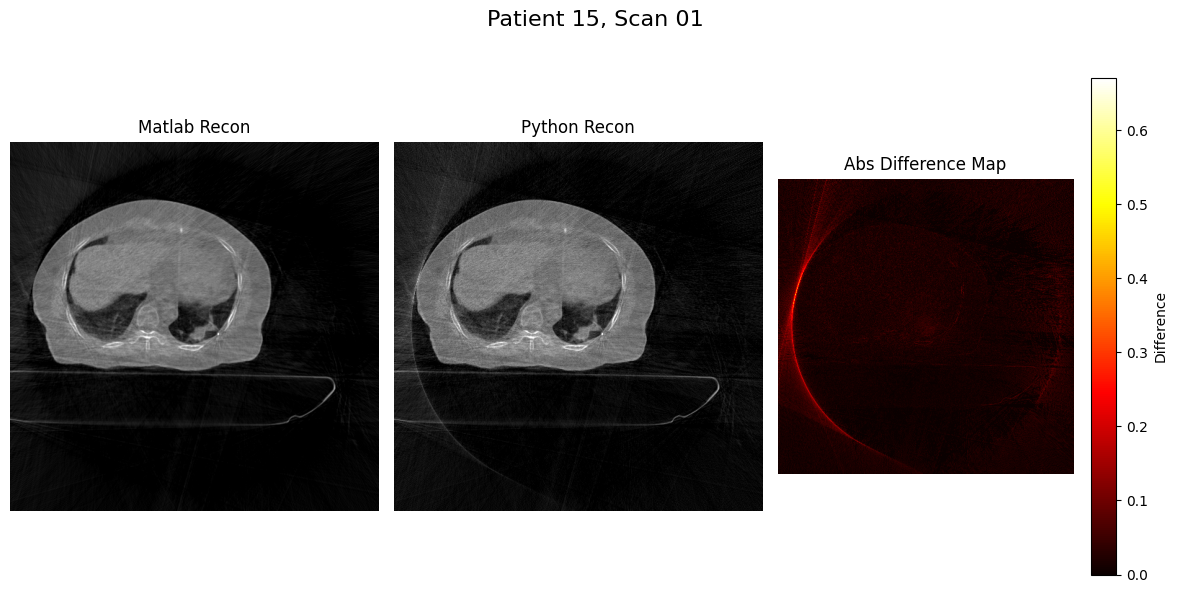

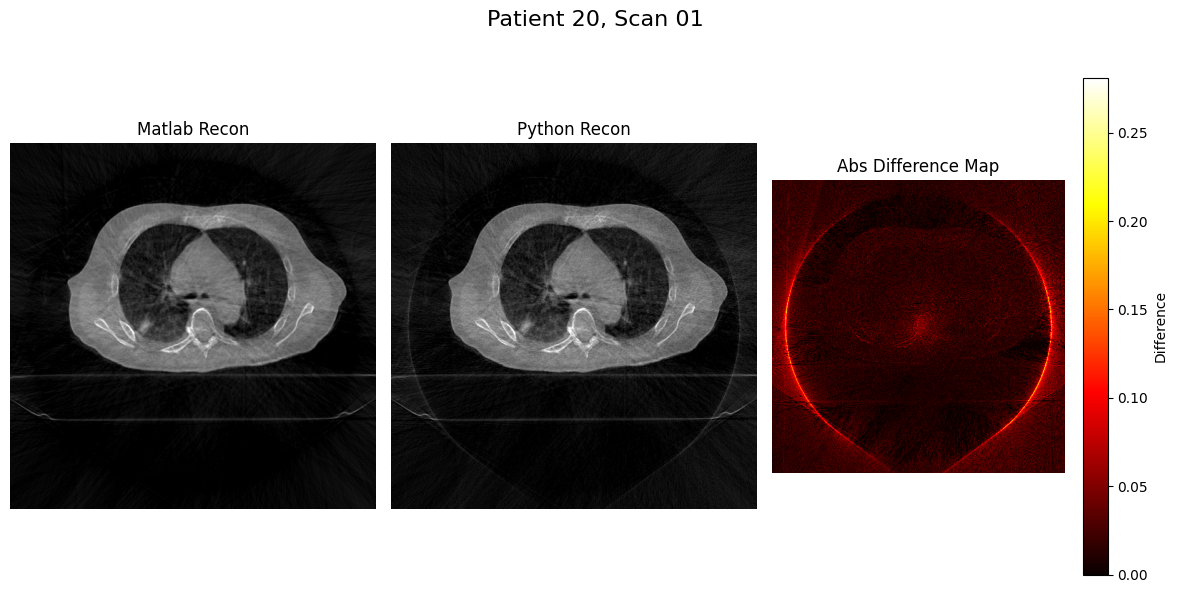

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

matlab_dir = os.path.join('H:', 'Public', 'Noah', 'MK7_07')

test_scans = [('08', '01'), ('10', '01'), ('14', '01'), ('14', '02'), ('15', '01'), ('20', '01')]
# reconFDK_p08.HF01.HF_ns.mat
for patient, scan in test_scans:
    mat_file = f"reconFDK_p{patient}.HF{scan}.HF_ns.mat"
    python_file = FILES.get_recon_filepath('MK7_07', patient, scan, 'HF', False)

    mat_data = scipy.io.loadmat(os.path.join(matlab_dir, mat_file))['reconFDK']
    python_data = torch.load(python_file).cpu().numpy()

    # Clip both to [0, 0.04] then multiply by 25
    mat_data = np.clip(mat_data, 0, 0.04) * 25.
    python_data = np.clip(python_data, 0, 0.04) * 25.

    slice_index = 100
    mat_slice = mat_data[:, :, slice_index]
    python_slice = python_data[slice_index, :, :].T

    # # Apply circular mask to both slices
    # radius = 225
    # y, x = np.ogrid[:mat_slice.shape[0], :mat_slice.shape[1]]
    # center = (mat_slice.shape[0] // 2, mat_slice.shape[1] // 2)
    # mask = (x - center[1])**2 + (y - center[0])**2 <= radius**2
    # mat_slice[~mask] = 0
    # python_slice[~mask] = 0

    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Patient {patient}, Scan {scan}', fontsize=16)
    plt.subplot(1, 3, 1)
    plt.imshow(mat_slice, cmap='gray', vmin=0, vmax=1)
    plt.title(f'Matlab Recon')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(python_slice, cmap='gray', vmin=0, vmax=1)
    plt.title(f'Python Recon')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    diff_slice = np.abs(mat_slice - python_slice)
    plt.imshow(diff_slice, cmap='hot')
    plt.colorbar(label='Difference')
    plt.title(f'Abs Difference Map')
    plt.axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

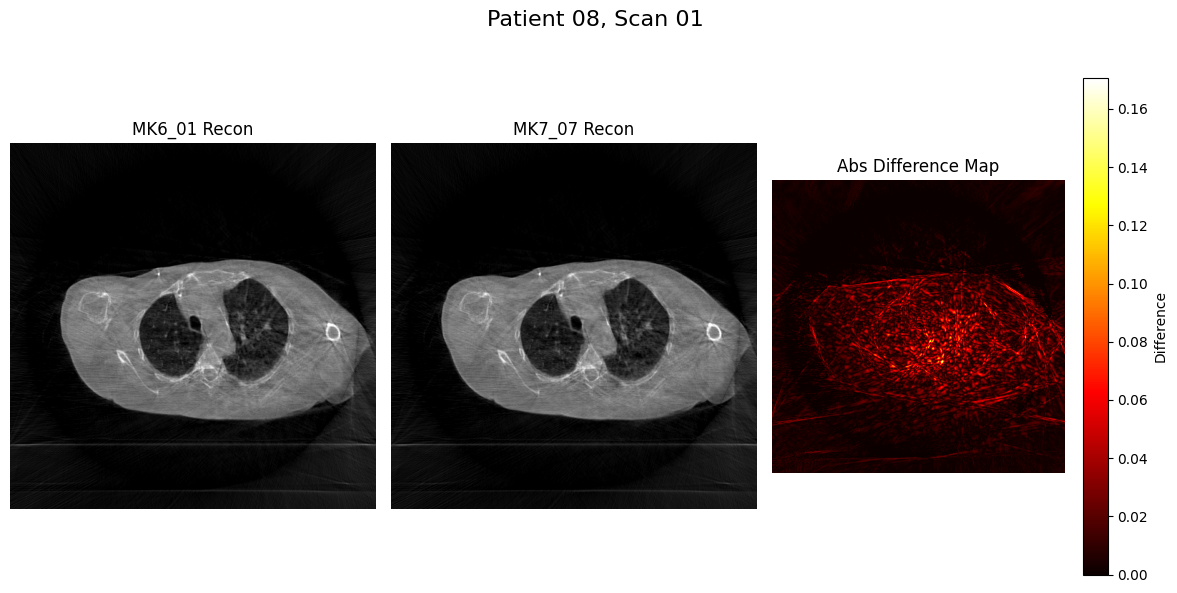

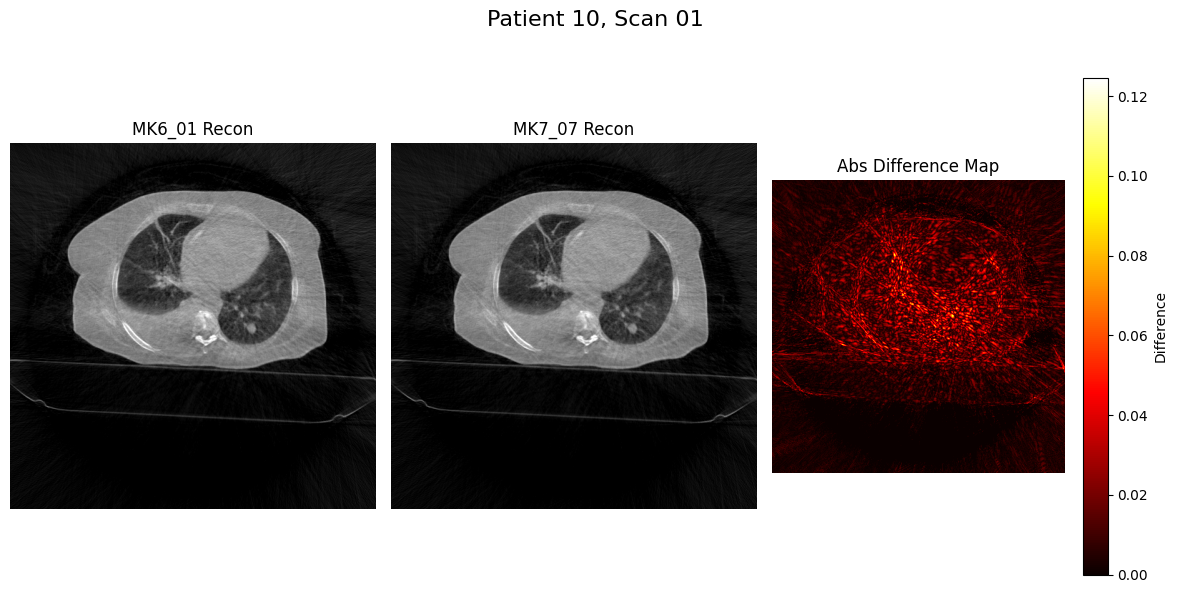

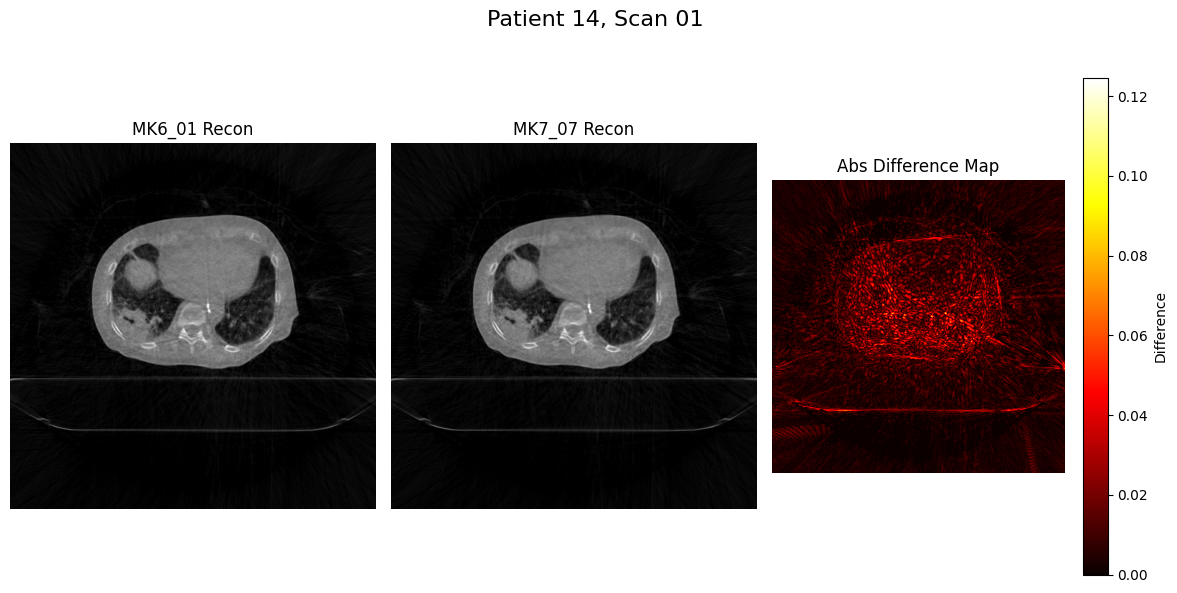

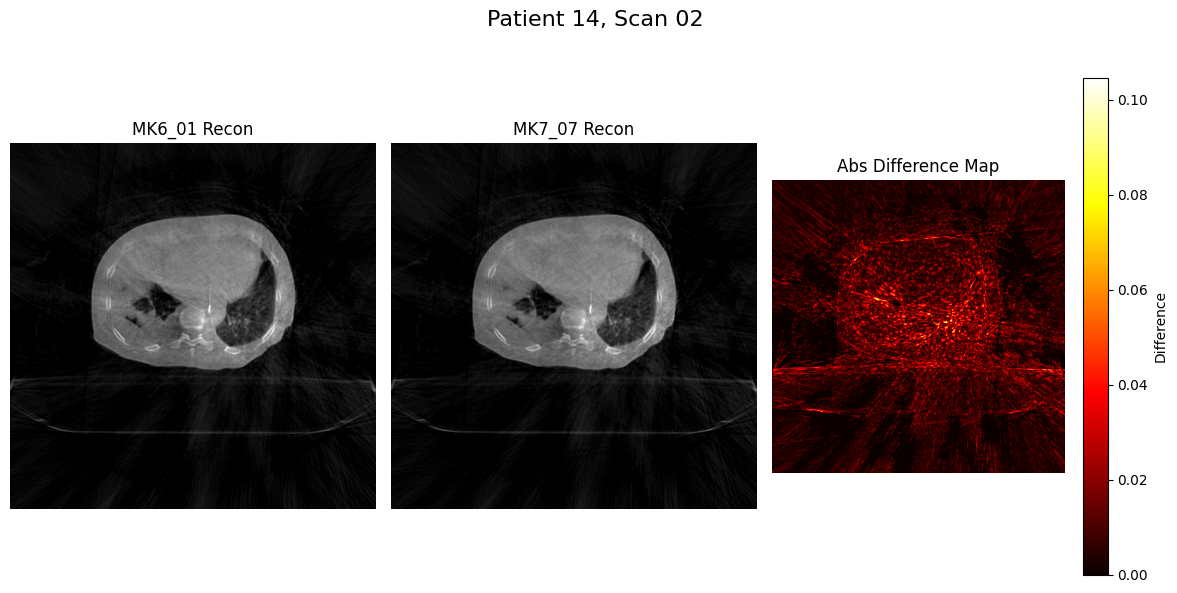

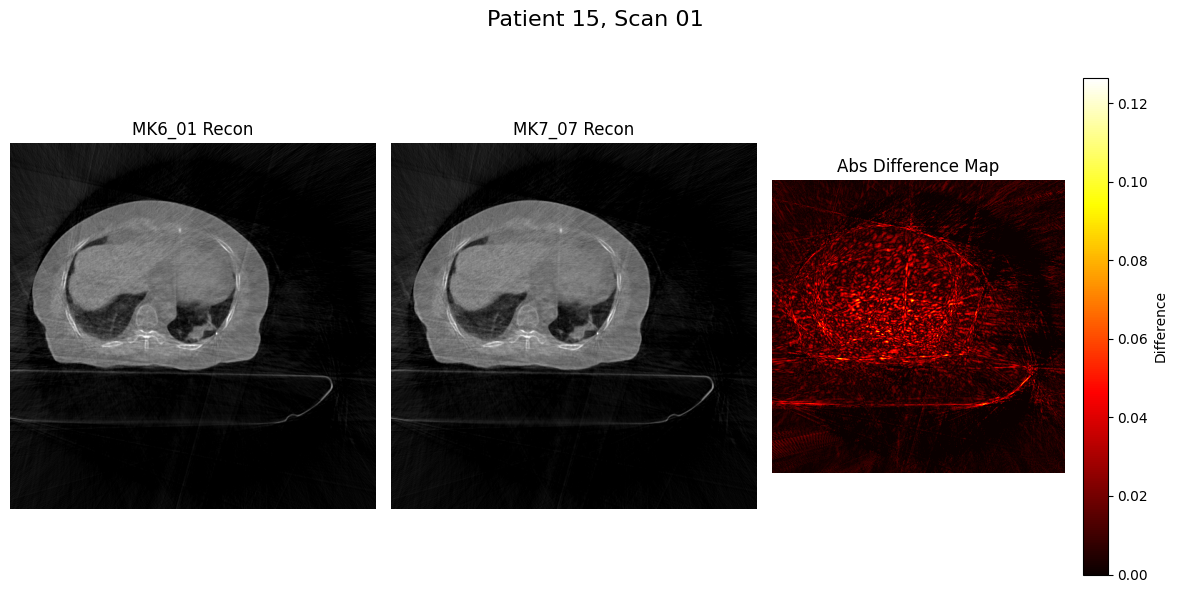

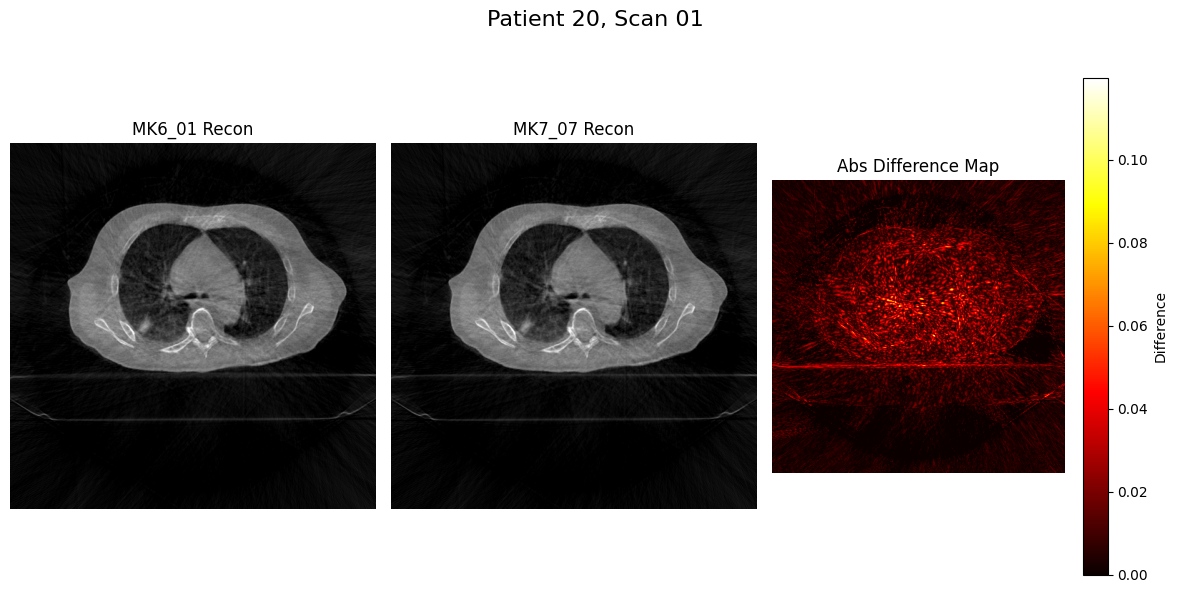

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

matlab_dir_MK6 = os.path.join('H:', 'Public', 'Noah', 'MK6_01')
matlab_dir_MK7 = os.path.join('H:', 'Public', 'Noah', 'MK7_07')

test_scans = [('08', '01'), ('10', '01'), ('14', '01'), ('14', '02'), ('15', '01'), ('20', '01')]
# reconFDK_p08.HF01.HF_ns.mat
for patient, scan in test_scans:
    mat_file = f"reconFDK_p{patient}.HF{scan}.HF_ns.mat"
    python_file = FILES.get_recon_filepath('MK7_07', patient, scan, 'HF', False)

    mat_data_MK6 = scipy.io.loadmat(os.path.join(matlab_dir_MK6, mat_file))['reconFDK']
    mat_data_MK7 = scipy.io.loadmat(os.path.join(matlab_dir_MK7, mat_file))['reconFDK']

    # Clip both to [0, 0.04] then multiply by 25
    mat_data_MK6 = np.clip(mat_data_MK6, 0, 0.04) * 25.
    mat_data_MK7 = np.clip(mat_data_MK7, 0, 0.04) * 25.

    slice_index = 100
    mat_slice_MK6 = mat_data_MK6[:, :, slice_index]
    mat_slice_MK7 = mat_data_MK7[:, :, slice_index]

    # # Apply circular mask to both slices
    # radius = 225
    # y, x = np.ogrid[:mat_slice_MK6.shape[0], :mat_slice_MK6.shape[1]]
    # center = (mat_slice_MK6.shape[0] // 2, mat_slice_MK6.shape[1] // 2)
    # mask = (x - center[1])**2 + (y - center[0])**2 <= radius**2
    # mat_slice_MK6[~mask] = 0
    # mat_slice_MK7[~mask] = 0

    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Patient {patient}, Scan {scan}', fontsize=16)
    plt.subplot(1, 3, 1)
    plt.imshow(mat_slice_MK6, cmap='gray', vmin=0, vmax=1)
    plt.title(f'MK6_01 Recon')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(mat_slice_MK7, cmap='gray', vmin=0, vmax=1)
    plt.title(f'MK7_07 Recon')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    diff_slice = np.abs(mat_slice_MK6 - mat_slice_MK7)
    plt.imshow(diff_slice, cmap='hot')
    plt.colorbar(label='Difference')
    plt.title(f'Abs Difference Map')
    plt.axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

model_versions = ['MK7_{i:02d}' for i in range (1, 8)]

test_scans = [('08', '01'), ('10', '01'), ('14', '01'), ('14', '02'), ('15', '01'), ('20', '01')]
for patient, scan in test_scans:
    python_files = [FILES.get_recon_filepath(model_version, patient, scan, 'HF', False) for model_version in model_versions]

    pt_data = [torch.load(python_file).cpu().numpy() for python_file in python_files]

    # Clip both to [0, 0.04] then multiply by 25
    pt_data = [np.clip(data, 0, 0.04) * 25. for data in pt_data]

    slice_index = 100  # Set to None to skip extracting a slice

    if slice_index is not None:
        pt_data = [data[slice_index:slice_index+1, :, :].T for data in pt_data]
    
    # Clear memory
    for i in range(len(pt_data)):
        x = pt_data.pop(0)
        del x

    # Apply circular mask to all slices (3D: [slices, height, width])
    apply_mask = True
    if apply_mask:
        radius = 225
        height, width = pt_data[0].shape[1], pt_data[0].shape[2]
        y, x = np.ogrid[:height, :width]
        center = (height // 2, width // 2)
        mask = (x - center[1])**2 + (y - center[0])**2 <= radius**2
        # mask shape: [height, width], data shape: [slices, height, width]
        pt_data = [np.where(mask, data, 0) for data in pt_data]

    # Compute the mean and standard deviation across the model versions for all pixels/voxels
    mean_data = np.mean(pt_data, axis=0)
    std_data = np.std(pt_data, axis=0)

    # Plot the mean and standard deviation
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Patient {patient}, Scan {scan}', fontsize=16)
    plt.subplot(1, 2, 1)
    plt.imshow(mean_data, cmap='gray', vmin=0, vmax=1)
    plt.title(f'Mean Recon')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(std_data, cmap='hot')
    plt.colorbar(label='Standard Deviation')
    plt.title(f'Standard Deviation Map')
    plt.axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

NameError: name 'FILES' is not defined